<a href="https://colab.research.google.com/github/enakirimoto/projeto-puc-analise-de-dados-e-boas-praticas/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Eric_Nakirimoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Eric Koji Nakirimoto

**Matrícula:** 4052025000088

**Dataset:** [OEE dataset](https://github.com/enakirimoto/projeto-puc-analise-de-dados-e-boas-praticas/blob/main/Database_final.csv)


# Descrição do Problema

O conjunto de dados de OEE é um conjunto de dados de performance algumas máquinas semelhantes. Nesses dados há uma lista de máquinas definidas por : Maquina Alpha, Maquina Beta, Maquina Gamma, Maquina Delta, Maquina Epsilon, Maquina Zeta, Maquina Eta, Maquina Theta, Maquina Iota, Maquina Kappa, Maquina Lambda, Maquina Sigma, Maquina Omega. O objetivo principal é entender o comportamento dos atributos dia da semana, OEE, IE, IQ e eventos de parada para criar um modelo.

## Hipóteses do Problema

As hipóteses que traçadas foram as seguintes:

- Há alguma correlação entre o OEE e o dia da semana?

- Existe alguma correlação entre o OEE e os eventos de parada?

- Há algum padrão visual entre os equipamentos?


## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de variáveis (dia da semana, turno, máquina e histórico), o objetivo é prever o OEE do equipamento no dia seguinte.

## Seleção de Dados

O dataset de máquinas é um dataset de um grupo de equipamentos que foi coletado com o uso de um sistema de execução de manufatura. Nesse dataset, alguns eventos foram agrupados e os nomes da máquinas foram alterados com o objetivo de anonimizar os dados. Esse dataset está na com vários problemas que foram mantidos com o objetivo de exercitar os conhecimentos adquiridos nas disciplinas.

## Atributos do Dataset

O dataset contém registros de produção industrial com diversos indicadores de desempenho e eventos. Possui os seguintes atributos:

- **Data**: data do registro  
- **Turno**: turno de operação  
- **PEvento**: evento de parada com maior duração  
- **FreqPEvento**: frequência de ocorrência do evento de parada com maior duração
- **DuracaoPEvento**: duração total do evento de parada de maior duração
- **SEvento**: evento de parada com a segunda maior duração
- **FreqSEvento**: frequência de ocorrência do evento com a segunda maior duração
- **DuracaoSEvento**: duração total do evento com a segunda maior duração
- **Somatoral**: tempo total acumulado em todos os eventos
- **Dds**: dia da semana em código
- **Maquina**: identificador da máquina  
- **Meta**: meta de OEE
- **Dds2**: dia da semana descrito  
- **ID**: índice de disponibilidade do equipamento que está relacionado a quanto tempo a máquina esteve disponível para a produção  
- **IE**: índice de eficiência que está relacionado a eficiência de execução de ordens de produção  
- **IQ**: índice de qualidade  
- **OEE**: overall equipment effectiveness — eficiência geral dos equipamentos, que é o resultado da multiplicação de IDxIQxIE


## Observações:

O índice de disponibilidade é obtido comparando o tempo disponível de produção, na qual desconsidera finais de semana e eventos não punitivos, com os eventos de parada não planejada. O índice de eficiência é obtido comparando o tempo padrão de produção com o tempo produzido. O índice de qualidade é obtido comparando o que foi produzido com o que foi produzido com defeito. Os eventos são os eventos apontados manualmente pelos operadores. Todas as informações são obtidas por meio de apontamento manual feito pelos operadores em um sistema de execução de manufatura. O sistema de execução de manufatura é um software de apontamento de eventos e ordens de produção. O operador deveria iniciar uma ordem de produção no início do processo e apontar as peças produzidas no final do processo.   

- Início das bibliotecas

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
from scipy.stats import shapiro

- Ínício do carregamento dos dados da base de dados.

In [56]:
url = "https://raw.githubusercontent.com/enakirimoto/projeto-puc-analise-de-dados-e-boas-praticas/refs/heads/main/Database_final.csv"

df = pd.read_csv(url)

# Check de dados
print(df.head())



         Data  Turno           PEvento  FreqPEvento  DuracaoPEvento  \
0  2025-01-10      1  Parada planejada            1         33480.0   
1  2025-01-10      2  Parada planejada            1         32760.0   
2  2025-01-10      3  Parada planejada            1         31560.0   
3  2025-01-10      1  Parada planejada            4         18521.0   
4  2025-01-10      2          OPERANDO           35         13148.0   

      SEvento  FreqSEvento  DuracaoSEvento  Somatoral  Dds        Maquina  \
0         NaN          NaN             NaN    33480.0  6.0  Maquina Alpha   
1         NaN          NaN             NaN    32760.0  6.0  Maquina Alpha   
2         NaN          NaN             NaN    31560.0  6.0  Maquina Alpha   
3    OPERANDO         19.0          8478.0    30600.0  6.0   Maquina Beta   
4  PREPARAÇÃO          2.0          2912.0    30600.0  6.0   Maquina Beta   

   Meta         Dds2     ID      IE     IQ    OEE  
0  65.0  sexta-feira    NaN     NaN    NaN    NaN  
1  65.

- Iniciando a análise exploratória dos dados avaliando algumas informações do dataframe. Já nas primeiras linhas percebe-se vários "NaN", que precisam ser tratados conforme a regra.


In [57]:
print(df.values)
print(df.info())
print(df.isnull().sum())


[['2025-01-10' 1 'Parada planejada' ... nan nan nan]
 ['2025-01-10' 2 'Parada planejada' ... nan nan nan]
 ['2025-01-10' 3 'Parada planejada' ... nan nan nan]
 ...
 ['2025-06-08' 2 'FIM DE SEMANA' ... nan nan nan]
 ['2025-06-08' 1 'FIM DE SEMANA' ... nan nan nan]
 ['2025-06-08' 2 'FIM DE SEMANA' ... nan nan nan]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5774 entries, 0 to 5773
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Data            5774 non-null   object 
 1   Turno           5774 non-null   int64  
 2   PEvento         5774 non-null   object 
 3   FreqPEvento     5774 non-null   int64  
 4   DuracaoPEvento  5774 non-null   float64
 5   SEvento         4153 non-null   object 
 6   FreqSEvento     4153 non-null   float64
 7   DuracaoSEvento  4153 non-null   float64
 8   Somatoral       5774 non-null   float64
 9   Dds             5772 non-null   float64
 10  Maquina         5772 non-null   o

- O dataset possui 17 atributos e 5774 instâncias.  
- Aparentemente há vários dados com formatações despadronizadas e valores com "NaN". Apenas as colunas de Data, Turno, Pevento, Freqpevento e DuracaoPEvento  possuem 100% dos dados.  São poucas informações para tomar uma decisão de substituir as variáveis "NaN" por algum valor coerente. Vou explorar um pouco mais para entender um pouco mais sobre os dados.

In [58]:
print(df.columns)
print(df.dtypes)

Index(['Data', 'Turno', 'PEvento', 'FreqPEvento', 'DuracaoPEvento', 'SEvento',
       'FreqSEvento', 'DuracaoSEvento', 'Somatoral', 'Dds', 'Maquina', 'Meta',
       'Dds2', 'ID', 'IE', 'IQ', 'OEE'],
      dtype='object')
Data               object
Turno               int64
PEvento            object
FreqPEvento         int64
DuracaoPEvento    float64
SEvento            object
FreqSEvento       float64
DuracaoSEvento    float64
Somatoral         float64
Dds               float64
Maquina            object
Meta              float64
Dds2               object
ID                float64
IE                float64
IQ                float64
OEE               float64
dtype: object


- Os dados são compostos por atributos numéricos(float64) e strings(object), vou plotar os dados do OEE, que será a variável de saída do modelo em um gráfico de linhas para entender o comportamento dos dados numéricos.  A data não está no formato adequado, logo vou precisar ajustar os dados primeiro. Também vou selecionar apenas duas máquinas para não deixar poluido o gráfico.


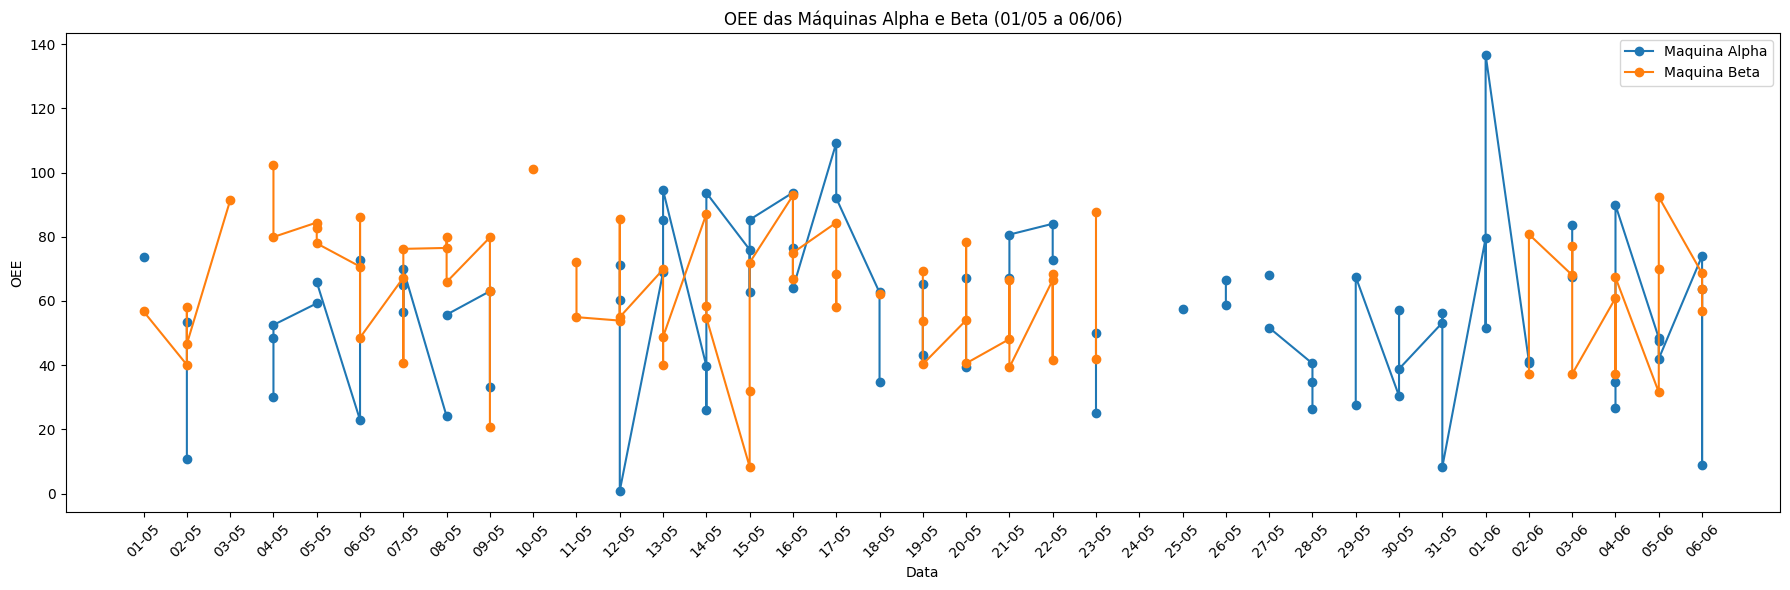

In [59]:
# Filtrar Alpha e Beta e arrumar a data
df_filtered = df[df['Maquina'].isin(['Maquina Alpha', 'Maquina Beta'])].copy()
df_filtered['Data'] = pd.to_datetime(df_filtered['Data'])

#Organizar
start_date = pd.to_datetime('2025-05-01')
end_date = pd.to_datetime('2025-06-06')
df_filtered = df_filtered[(df_filtered['Data'] >= start_date) & (df_filtered['Data'] <= end_date)]

df_filtered = df_filtered.sort_values('Data').reset_index(drop=True)

# Criar gráfico
fig, ax = plt.subplots(figsize=(18, 6))

for machine in ['Maquina Alpha', 'Maquina Beta']:
    df_machine = df_filtered[df_filtered['Maquina'] == machine]
    ax.plot(df_machine['Data'], df_machine['OEE'], marker='o', linestyle='-', label=machine)
ax.set_xlabel('Data')
ax.set_ylabel('OEE')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
step = 1
ax.set_xticks(df_filtered['Data'].drop_duplicates()[::step])
plt.xticks(rotation=45)
ax.legend()
plt.title('OEE das Máquinas Alpha e Beta (01/05 a 06/06)')
plt.tight_layout()
plt.show()

- Aparentemente não são todas as máquinas que possuem apontamentos nos sábados e domingos. Ainda não dá para afirmar que todos os dados podem ser apagados mas deve-se avaliar os eventos do dia para entender o que está ocorrendo.

In [60]:
# Filtrar intervalo de datas entre 01/05 e 06/06
df_filtered2 = df_filtered
start_date2 = pd.to_datetime('2025-05-22')
end_date2 = pd.to_datetime('2025-05-27')
df_filtered2 = df_filtered2[(df_filtered2['Data'] >= start_date2) & (df_filtered2['Data'] <= end_date2)]

filtered = ['Data','PEvento','SEvento', 'OEE', 'Dds2','Dds']
df_colunas_selecionadas = df_filtered2[filtered]
print(df_colunas_selecionadas)

          Data                        PEvento  \
123 2025-05-22                       OPERANDO   
124 2025-05-22                       OPERANDO   
125 2025-05-22                       OPERANDO   
126 2025-05-22            TURNO NÃO PLANEJADO   
127 2025-05-22                       OPERANDO   
128 2025-05-22                       OPERANDO   
129 2025-05-23            TURNO NÃO PLANEJADO   
130 2025-05-23               Parada planejada   
131 2025-05-23               Parada planejada   
132 2025-05-23                       OPERANDO   
133 2025-05-23               Parada planejada   
134 2025-05-23            TURNO NÃO PLANEJADO   
135 2025-05-24                  FIM DE SEMANA   
136 2025-05-24                  FIM DE SEMANA   
137 2025-05-24                  FIM DE SEMANA   
138 2025-05-24                  FIM DE SEMANA   
139 2025-05-24                  FIM DE SEMANA   
140 2025-05-25                  FIM DE SEMANA   
141 2025-05-25                  FIM DE SEMANA   
142 2025-05-25      

- Ao avaliar os eventos, identificaram-se que alguns eventos explicam o valor de OEE estar "NaN". O evento "FIM DE SEMANA", "TURNO NÃO PLANEJADO" e "MANUTENÇÃO PREVENTIVA", quando inseridos como eventos de maior duração e sem o segundo evento registrado, fica claros serem dias sem operação. Por conseguinte, pensando-se em um dataset que será utilizado para o treinamento de um modelo, entende-se que podemos retirar os finais de semana. Já as manutenções preventivas não são fixas no ano, e retirar a data da base de dados pode prejudicar o modelo, logo os finais de semana serão eliminados e os eventos não punitivos serão substituidos pelo valor da mediana da população.

            Data  Turno              PEvento  FreqPEvento  DuracaoPEvento  \
0     2025-01-10      1     Parada planejada            1         33480.0   
1     2025-01-10      2     Parada planejada            1         32760.0   
2     2025-01-10      3     Parada planejada            1         31560.0   
3     2025-01-10      1     Parada planejada            4         18521.0   
4     2025-01-10      2             OPERANDO           35         13148.0   
...          ...    ...                  ...          ...             ...   
5704  2025-06-06      2             OPERANDO           10         28171.0   
5705  2025-06-06      3  TURNO NÃO PLANEJADO            1         31560.0   
5706  2025-06-06      1             OPERANDO           17         24497.0   
5707  2025-06-06      2             OPERANDO           23         13542.0   
5708  2025-06-06      3  TURNO NÃO PLANEJADO            1         31560.0   

                            SEvento  FreqSEvento  DuracaoSEvento  Somatoral

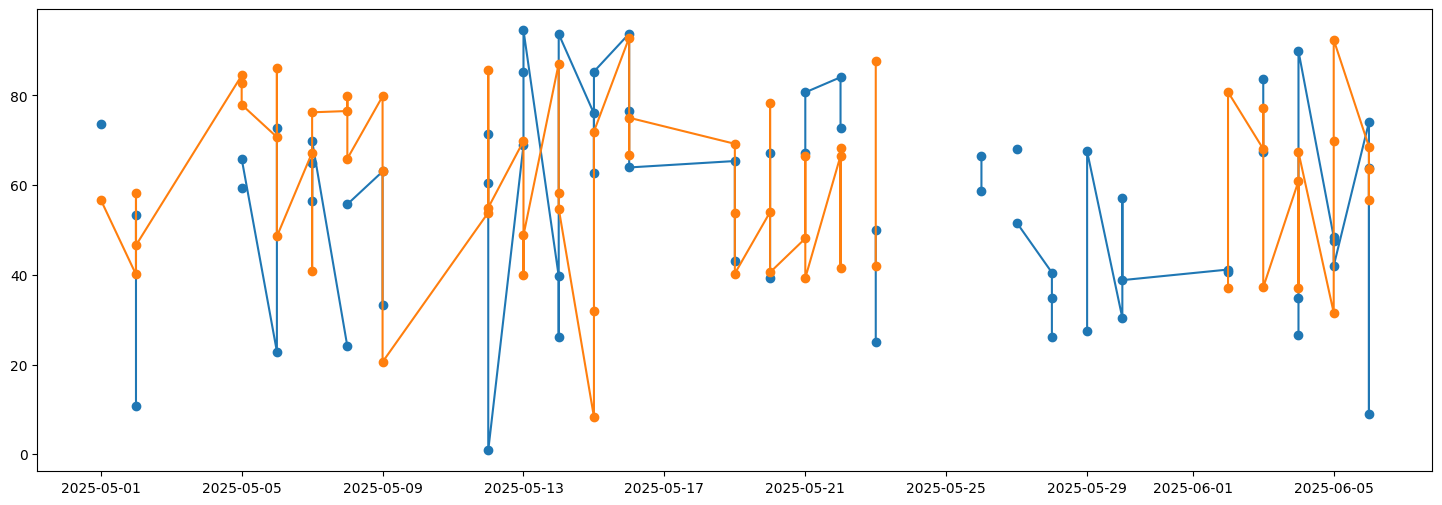

In [61]:
df = df[~df["Dds"].isin([1, 7])]
print(df)

df_filtered = df_filtered[~df_filtered["Dds"].isin([1,7])]

# Criar gráfico
fig, ax = plt.subplots(figsize=(18, 6))
for machine in ['Maquina Alpha', 'Maquina Beta']:
    df_machine = df_filtered[df_filtered['Maquina'] == machine]
    ax.plot(df_machine['Data'], df_machine['OEE'], marker='o', linestyle='-', label=machine)

plt.show()

- Ainda há dados "NaN", mas parte das anomalias foram eliminadas. Vamos continuar trabalhando nas anomalias pois preciso limpar os dados antes de querer identificar alguma correlação que foi definida na hipótese.

          Data  Turno              PEvento  FreqPEvento  DuracaoPEvento  \
0   2025-05-01      1     Parada planejada            1         31825.0   
1   2025-05-01      2             OPERANDO           18         17370.0   
2   2025-05-01      3  TURNO NÃO PLANEJADO            1         20160.0   
3   2025-05-01      1     Parada planejada            1         30600.0   
4   2025-05-01      2     Parada planejada            1         30600.0   
..         ...    ...                  ...          ...             ...   
213 2025-06-06      3  TURNO NÃO PLANEJADO            5         14294.0   
214 2025-06-06      2             OPERANDO           18         13179.0   
215 2025-06-06      1  ProblemasManutencao            2         24387.0   
216 2025-06-06      2             OPERANDO           20         20661.0   
217 2025-06-06      3  TURNO NÃO PLANEJADO            3         14472.0   

               SEvento  FreqSEvento  DuracaoSEvento  Somatoral  Dds  \
0             OPERANDO      

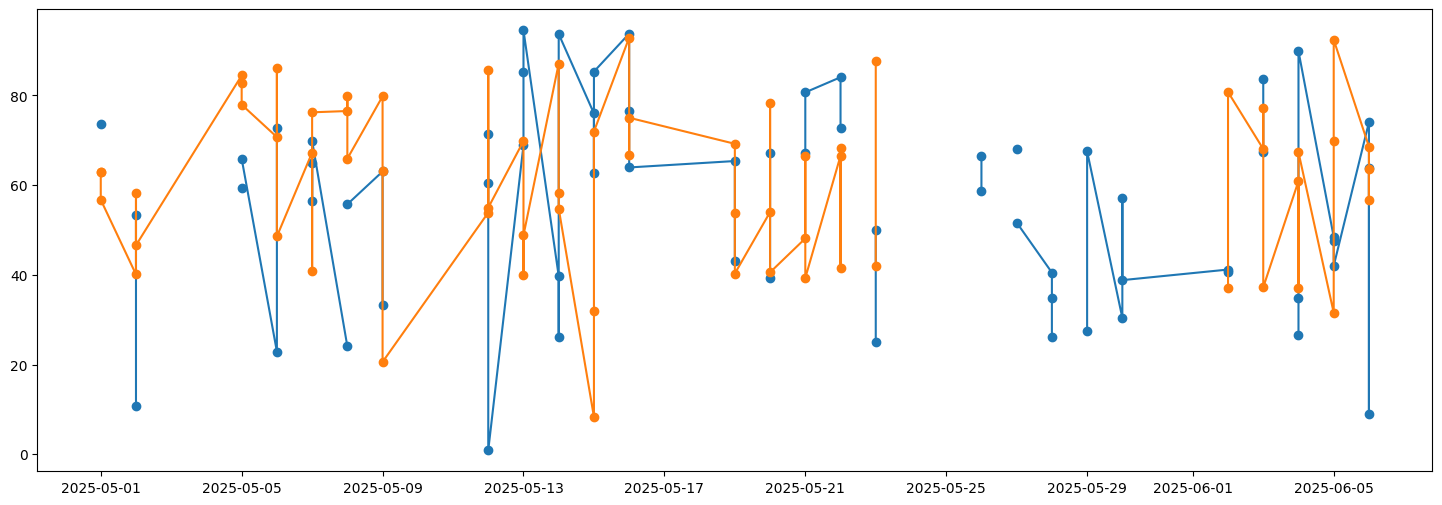

In [62]:
# Calcula a mediana dos campos desejados e substitui
mediana_oee = df["OEE"].median()
mediana_id = df["ID"].median()
mediana_ie = df["IE"].median()
mediana_iq = df["IQ"].median()

condicao = (df["PEvento"] == "Parada planejada") &  (df["SEvento"].isna())
df.loc[condicao, "OEE"] = mediana_oee
df.loc[condicao, "ID"] = mediana_id
df.loc[condicao, "IE"] = mediana_ie
df.loc[condicao, "IQ"] = mediana_iq


mediana_oee2 = df_filtered["OEE"].median()
mediana_id2 = df_filtered["ID"].median()
mediana_ie2 = df_filtered["IE"].median()
mediana_iq2 = df_filtered["IQ"].median()

condicao = (df_filtered["PEvento"] == "Parada planejada") & (df_filtered["SEvento"].isna())
df_filtered.loc[condicao, "OEE"] = mediana_oee2
df_filtered.loc[condicao, "ID"] = mediana_id2
df_filtered.loc[condicao, "IE"] = mediana_ie2
df_filtered.loc[condicao, "IQ"] = mediana_iq2

print(df_filtered)

# Criar gráfico
fig, ax = plt.subplots(figsize=(18, 6))
for machine in ['Maquina Alpha', 'Maquina Beta']:
    df_machine = df_filtered[df_filtered['Maquina'] == machine]
    ax.plot(df_machine['Data'], df_machine['OEE'], marker='o', linestyle='-', label=machine)

plt.show()


- Para não se estender na explicação, será feita uma simplificação nos dados. Vou substituir os outros valores que estão "NaN" pela "0" para calcular os dados estatísticos. E os valores "inf" pela mediana. Essa decisão foi feita para não se estender ao ponto de se tornar uma análise individual de cada dado. Agora vou começar a analisar algumas característica dos dados e executar a análise estatística.


In [63]:
df_stat = df.copy()
df_stat["OEE"] = df_stat["OEE"].replace([np.inf, -np.inf], mediana_oee)
df_stat["ID"] = df_stat["ID"].replace([np.inf, -np.inf], mediana_id)
df_stat["IE"] = df_stat["IE"].replace([np.inf, -np.inf], mediana_ie)
df_stat[["OEE", "ID", "IE", "IQ"]] = df_stat[["OEE", "ID", "IE", "IQ"]].fillna(0)


df_stat.describe()


,Turno,FreqPEvento,DuracaoPEvento,FreqSEvento,DuracaoSEvento,Somatoral,Dds,Meta,ID,IE,IQ,OEE
count,4098.000000,4098.000000,4098.000000,3582.00000,3582.000000,4098.000000,4096.000000,4096.000000,4098.000000,4098.000000,4098.000000,4098.000000
mean,2.000244,12.232552,19366.196437,4.11474,3561.855109,29436.612494,4.020752,64.807617,44.610810,77.045627,77.330793,45.245510
std,0.816746,9.675620,7225.147213,4.77707,2752.817046,5387.967252,1.421382,3.671771,28.443241,44.805882,42.474480,30.936435
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,55.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,13856.000000,1.00000,1878.000000,25200.000000,3.000000,65.000000,20.690000,54.372500,100.000000,11.587500
50%,2.000000,13.000000,19020.000000,2.00000,2907.000000,32760.000000,4.000000,65.000000,53.285000,98.735000,100.000000,52.725000
75%,3.000000,20.000000,22833.500000,6.00000,4911.750000,33480.000000,5.000000,68.000000,66.170000,107.127500,100.000000,68.820000
max,3.000000,52.000000,33480.000000,42.00000,16202.000000,33480.000000,6.000000,69.000000,100.000000,250.520000,266.140000,172.500000


- Claramente temos alguns problemas aqui. Primeiro, há valores de "IQ" que são acima 100% e isso tecnicamente é impossível. Há valores exagerados de "OEE" e "IE". Estes em média não deveriam passar de 110%. Como o objetivo desse dataframe é analisar as correlações e dados estatísticos, vou eliminar todas as linhas que possuam dados fora dessa faixa pois vou assumir que esses dados são falhas humanas e podem contaminar as análises.

In [64]:
df_stat = df_stat[~((df_stat["IQ"] > 102) | (df_stat["OEE"] > 110) | (df_stat["IE"] > 110))]
df_stat.describe()

,Turno,FreqPEvento,DuracaoPEvento,FreqSEvento,DuracaoSEvento,Somatoral,Dds,Meta,ID,IE,IQ,OEE
count,3316.000000,3316.000000,3316.000000,2800.000000,2800.000000,3316.000000,3314.000000,3314.000000,3316.000000,3316.000000,3316.000000,3316.000000
mean,2.028347,11.447226,19837.208384,3.812500,3401.503214,29303.210796,4.024442,64.709113,40.502877,68.133007,71.609952,38.936773
std,0.823365,9.928823,7581.812939,4.591905,2801.057250,5521.824688,1.433612,3.778008,29.072117,44.842286,45.115541,29.549596
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,55.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,14034.000000,1.000000,1786.250000,25200.000000,3.000000,63.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,12.000000,19664.500000,2.000000,2828.000000,32760.000000,4.000000,65.000000,49.430000,93.655000,100.000000,45.390000
75%,3.000000,19.000000,23733.500000,5.000000,4856.500000,33480.000000,5.000000,68.000000,62.982500,102.880000,100.000000,62.287500
max,3.000000,52.000000,33480.000000,31.000000,16202.000000,33480.000000,6.000000,69.000000,100.000000,110.000000,101.870000,109.560000


- Para fazer as correlações, não dá para considerar apenas o valor do "OEE", pois há equipamentos que possuem capacidades distintas de "OEE". Vou criar um novo dataframe mais simples para analisarmos as correlações entre as máquinas, eventos e a diferença entre o OEE e a meta.

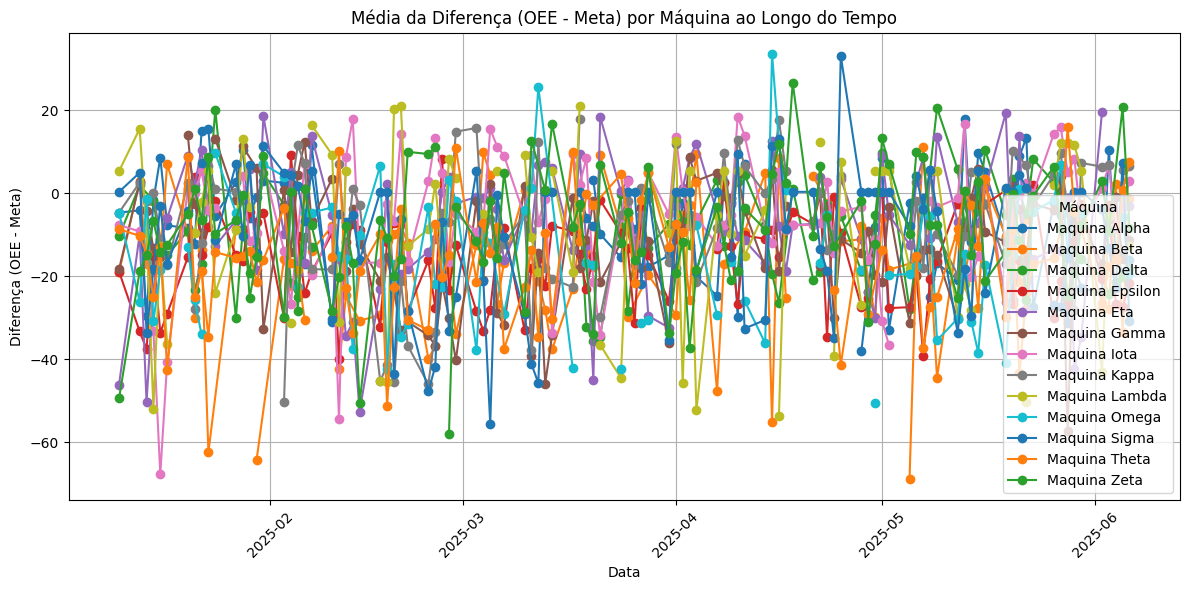

/tmp/ipython-input-65-1308840885.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Maquina", y="Diferença", data=df_novo, palette="Set3")


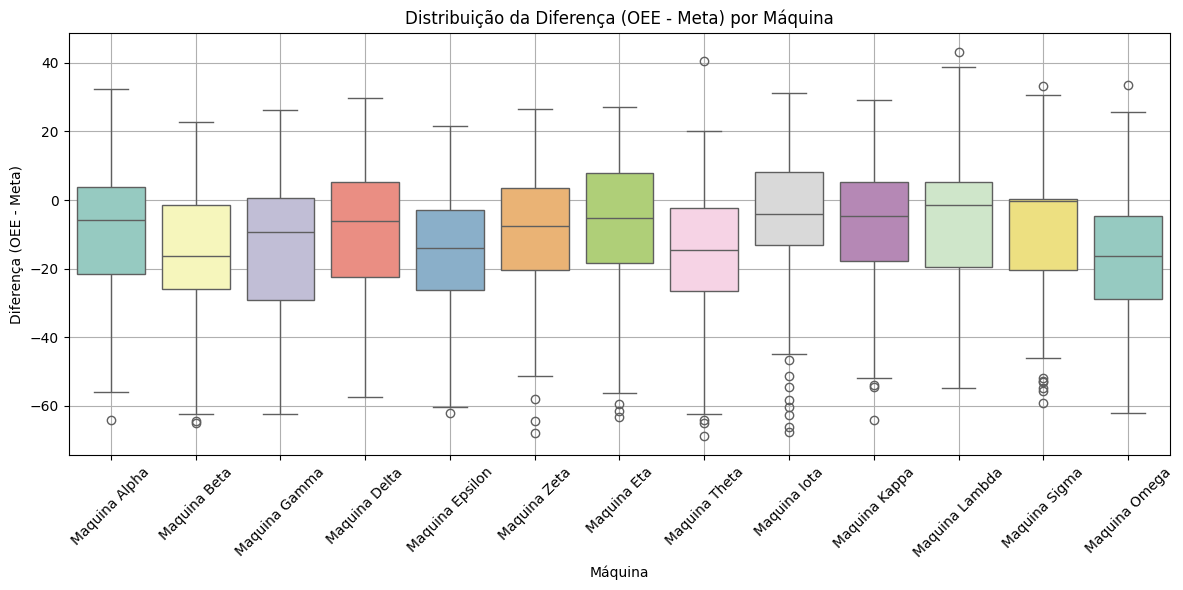

                 count       mean        std        min        25%        50%  \
Maquina                                                                         
Maquina Alpha     69.0  -8.355314  13.599678 -37.980000 -17.720000  -7.703333   
Maquina Beta      86.0 -16.225872  15.852746 -64.330000 -26.285000 -14.425000   
Maquina Delta     77.0  -8.976667  12.026510 -35.560000 -18.286667  -7.556667   
Maquina Epsilon  101.0 -15.444472  11.324143 -39.976667 -25.976667 -14.953333   
Maquina Eta      103.0  -8.019773  15.203661 -52.615000 -15.903333  -6.986667   
Maquina Gamma     99.0 -12.003535  14.101342 -57.380000 -19.250000 -11.200000   
Maquina Iota     101.0  -5.628515  14.888968 -67.740000 -12.060000  -4.995000   
Maquina Kappa     91.0  -6.948370  15.616804 -50.190000 -17.135000  -4.660000   
Maquina Lambda    77.0  -8.591580  20.212965 -53.730000 -18.975000  -4.150000   
Maquina Omega     76.0 -15.182325  16.432870 -50.530000 -29.106250 -16.217500   
Maquina Sigma     99.0  -9.7

In [65]:
#Aqui crio um novo dataframe
df_novo = df_stat[["Maquina", "Turno", "Dds2", "Data", "PEvento"]].copy()
df_novo["Diferença"] = df["OEE"] - df["Meta"]

#Aqui agrupo os dados por máquina e faço a média dos turnos e em seguida ploto para avaliar os dados
df_novo["Data"] = pd.to_datetime(df_novo["Data"])
df_agrupado = df_novo.groupby(["Maquina", "Data"])["Diferença"].mean().reset_index()
df_agrupado = df_agrupado.sort_values(by=["Maquina", "Data"])

#Traramento dos dados para o gráfico
df_agrupado["Data"] = pd.to_datetime(df_agrupado["Data"])
plt.figure(figsize=(12, 6))
for maquina in df_agrupado["Maquina"].unique():
    dados_maquina = df_agrupado[df_agrupado["Maquina"] == maquina]
    plt.plot(dados_maquina["Data"], dados_maquina["Diferença"], marker='o', label=maquina)
plt.title("Média da Diferença (OEE - Meta) por Máquina ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Diferença (OEE - Meta)")
plt.legend(title="Máquina")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Maquina", y="Diferença", data=df_novo, palette="Set3")

plt.title("Distribuição da Diferença (OEE - Meta) por Máquina")
plt.xlabel("Máquina")
plt.ylabel("Diferença (OEE - Meta)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

estatisticas_por_maquina = df_agrupado.groupby("Maquina")["Diferença"].describe()
print(estatisticas_por_maquina)



- Olhando as series temporais não há um padrão visual que justifique uma tendência no grupo de máquina, mas podemos registrar uma hipótese de que provavelmente um modelo só não seria adequado para todas as máquinas. Essa hipotese faz sentido pois são operadores diferentes e máquinas com capacidades distintas.

- Com o gráfico boxplot identificamos um número elevado de outliers, mas não serão retirados pois algumas simplificações de substituição de "NaN" foram feitas.

- Aparentemente, grande parte das máquinas estão com um percentual de OEE abaixo da meta. Os dados estatístiticos reforçam que não há um padrão claro de distribuição normal generalizado e por conseguinte, as decisões deveriam ser tomadas em relação aos percentil da amostra. Esse efeito era esperado, pois o OEE é composto por uma combinação de diferentes tipos de curvas. Para entender a correlação entre as máquinas, eventos e dia da semana e a diferença, avaliaram-se diversas combinações e converteu-se alguns objetos para variáveis lógicas. Usei o get_dummies por facilidade mas sei que existe o OneHotEncoder.

Correlação de variáveis categóricas com a coluna 'Diferença':
PEvento_OPERANDO                                  0.215411
Maquina_Maquina Iota                              0.085486
Maquina_Maquina Eta                               0.054951
Maquina_Maquina Kappa                             0.046729
PEvento_TURNO NÃO PLANEJADO                       0.042974
Maquina_Maquina Lambda                            0.039593
Maquina_Maquina Alpha                             0.035542
PEvento_MANUTENÇÃO PREVENTIVA                     0.027924
Maquina_Maquina Delta                             0.025867
PEvento_Parada planejada                          0.025110
Maquina_Maquina Sigma                             0.024820
Dds2_sexta-feira                                  0.024214
Dds2_terca-feira                                  0.018410
Maquina_Maquina Zeta                              0.013119
Dds2_quinta-feira                                 0.009828
PEvento_MANUTENÇÃO CORRETIVA AGENDADA            -0.0

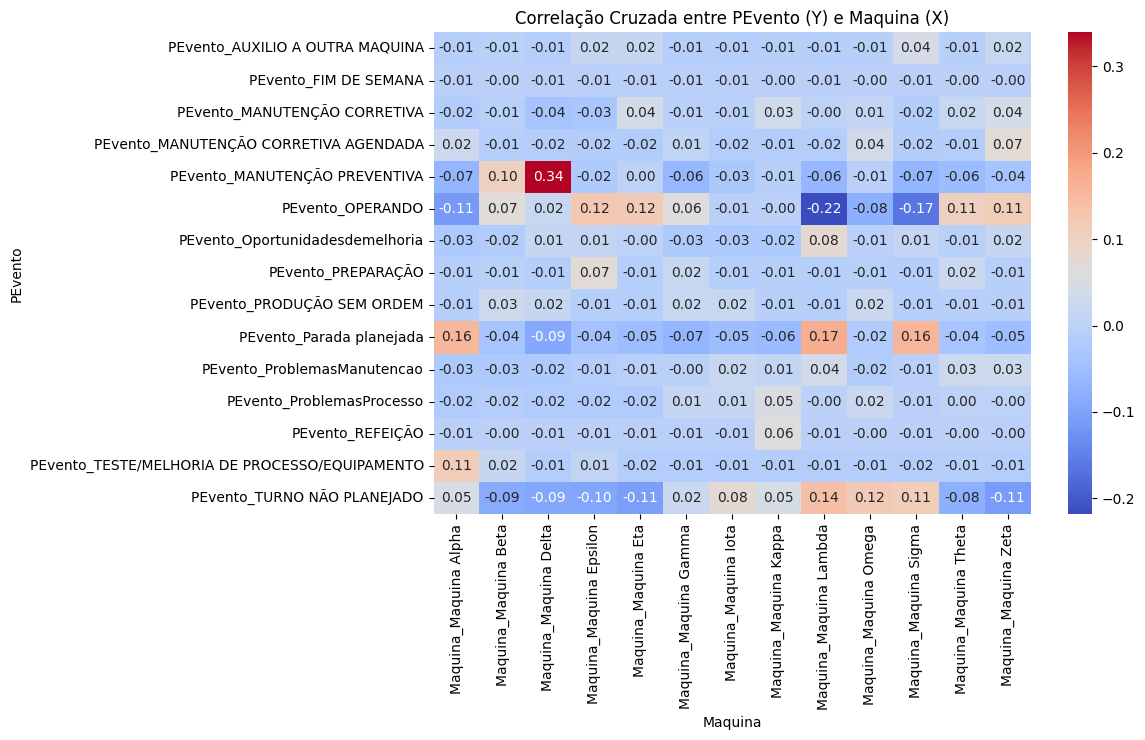

In [66]:
#Tratativas dos dados para dummies
dummies_maquina = pd.get_dummies(df_novo["Maquina"], prefix="Maquina")
dummies_dds2 = pd.get_dummies(df_novo["Dds2"], prefix="Dds2")
dummies_pevento = pd.get_dummies(df_novo["PEvento"], prefix="PEvento")
df_dummies = pd.concat([dummies_maquina, dummies_dds2, dummies_pevento, df_novo["Diferença"]], axis=1)
correlacoes = df_dummies.corr(numeric_only=True)["Diferença"].drop("Diferença").sort_values(ascending=False)
print("Correlação de variáveis categóricas com a coluna 'Diferença':")
print(correlacoes)

matriz_correlacao = pd.DataFrame(index=dummies_pevento.columns, columns=dummies_maquina.columns)

for pev_col in dummies_pevento.columns:
    for maq_col in dummies_maquina.columns:
        correlacao = dummies_pevento[pev_col].corr(dummies_maquina[maq_col])
        matriz_correlacao.loc[pev_col, maq_col] = correlacao

# Converte para float para o heatmap funcionar
matriz_correlacao = matriz_correlacao.astype(float)

# Plot
plt.figure(figsize=(12, max(6, len(dummies_pevento.columns)*0.5)))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação Cruzada entre PEvento (Y) e Maquina (X)")
plt.xlabel("Maquina")
plt.ylabel("PEvento")
plt.tight_layout()
plt.show()


- Com a estatística avaliada e as correlações entendemos que não há alguma característica clara de correlação entre algum evento ou performance e alguma equipamento. Alguns equipamentos apresentaram uma pequena correlação com o evento "Manutenção Preventiva" e "Operando", o que faz sentido pelo fato desses eventos não prejudicarem os indicadores.
------
    Com os dados obtidos já conseguimos responder as hipoteses:


**Há alguma correlação entre o OEE e o dia da semana?**
* Há um valor bem baixo de correlação que é insignificante se comparado a outros efeitos.

**Existe alguma correlação entre o OEE e os eventos de parada?**
* Sim, há uma pequena correlação em relação a alguns eventos mas que não passa de 0,3. A influência é baixa pois a ocorrência de alguns eventos é aleatória, logo não há um apontamento recorrente de alguns tipos de eventos. Exemplo: ProblemasManutencao ocorre aleatóriamente, pois nele são inclusas manutenções corretivas que só ocorrem em quebras de máquina, e não são todas as máquinas que vão quebrar durante esse intervalo de dados coletado.

**Há algum padrão visual entre os equipamentos?**
* Visual não, pois há diversos efeitos aleatórios e específicos de cada equipamento que os diferem entre eles.

---
 - Pensando-se na criação de um modelo treinado para predição, decidiu-se, por conta do pouco conhecimento em Machine Learning e por conta dos resultados obtidos, utilizar apenas os dados de uma máquina. A máquina escolhida foi a Omega por conta do comportamento mais estável observado no gráfico boxplot.

In [67]:
#Substitui os valores "NaN" e "0" pela mediana no dataframe que será utilizado no treinamento do modelo. Isso será feito pois o modelo será treinado para a predição de valor de OEE, mas desconsiderando os efeitos de eventos aleatórios que "zeram" o valor do OEE.*
df_unico = df.copy()
df_unico["OEE"] = df_unico["OEE"].fillna(mediana_oee)
df_unico["ID"] = df_unico["ID"].fillna(mediana_id)
df_unico["IE"] = df_unico["IE"].fillna(mediana_ie)
df_unico["IQ"] = df_unico["IQ"].fillna(mediana_iq)

df_unico["OEE"] = df_unico["OEE"].replace([0], mediana_oee)
df_unico["ID"] = df_unico["ID"].replace([0], mediana_id)
df_unico["IE"] = df_unico["IE"].replace([0], mediana_ie)

#Vou simplificar um pouco algumas variáveis que foram usadas exclusivamente na análise exploratória inicial
colunas_desejadas = ["Data", "Turno", "Maquina", "Meta", "Dds2", "ID", "IE", "IQ", "OEE"]
df_unico = df_unico[colunas_desejadas]
df_unico = df_unico[df_unico["Maquina"] == "Maquina Omega"]

#Criar uma nova coluna chamada Diferença que é a diferença entre a meta e o OEE e limpar as colunas desnecessárias
df_unico["Diferenca"] = df_unico["OEE"] - df_unico["Meta"]
colunas_desejadas2 = ["Data", "Turno", "Maquina", "Dds2", "ID", "IE", "IQ", "OEE", "Diferenca"]
df_unico = df_unico[colunas_desejadas2]

print(df_unico.head())


           Data  Turno        Maquina           Dds2     ID      IE     IQ  \
36   2025-01-10      1  Maquina Omega    sexta-feira  58.75  102.88  100.0   
37   2025-01-10      2  Maquina Omega    sexta-feira  58.75  102.88  100.0   
38   2025-01-10      3  Maquina Omega    sexta-feira  58.75  102.88  100.0   
152  2025-01-13      1  Maquina Omega  segunda-feira  33.03  103.32  100.0   
153  2025-01-13      2  Maquina Omega  segunda-feira  45.19   96.56  100.0   

       OEE  Diferenca  
36   60.34      -4.66  
37   60.34      -4.66  
38   60.34      -4.66  
152  34.13     -30.87  
153  43.64     -21.36  


- Agora vou repetir algumas análises estatísticas e plotar alguns gráficos para entender um pouco dos comportamentos da Maquina Omega.

            Turno          ID          IE          IQ         OEE   Diferenca
count  318.000000  318.000000  318.000000  318.000000  318.000000  318.000000
mean     2.000000   56.193428  106.003994  100.095377   60.086509   -4.913491
std      0.817783   15.483960   12.830462    0.863177   19.131464   19.131464
min      1.000000    4.880000   18.770000  100.000000    3.000000  -62.000000
25%      1.000000   49.217500  102.880000  100.000000   51.212500  -13.787500
50%      2.000000   58.750000  102.990000  100.000000   60.340000   -4.660000
75%      3.000000   63.307500  112.460000  100.000000   71.175000    6.175000
max      3.000000   92.820000  171.900000  114.000000  106.020000   41.020000


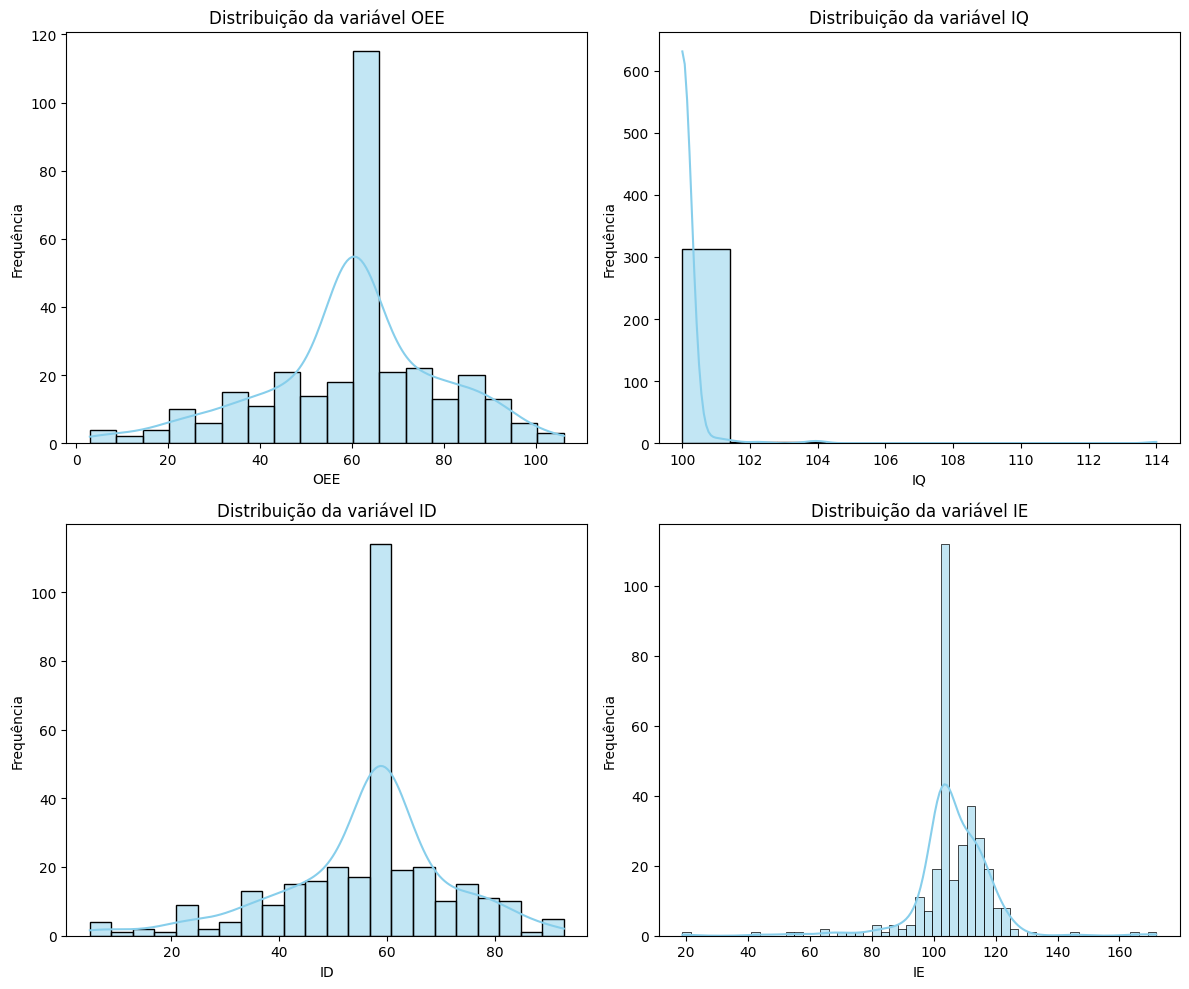

In [68]:
print(df_unico.describe())
# Lista das variáveis a serem analisadas
variaveis = ["OEE", "IQ", "ID", "IE"]

# Criação de uma figura com 2 linhas x 2 colunas para os subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterar para plotar cada variável
for var, ax in zip(variaveis, axes.flatten()):
    sns.histplot(df_unico[var], kde=True, ax=ax, color="skyblue")
    ax.set_title(f"Distribuição da variável {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Frequência")

plt.tight_layout()
plt.show()


- Agora vou refinar um pouco da limpeza dos dados pois identificou-se variáveis de "IQ" e "IE" acima do valor aceitável. Vou substitui-los pela mediana. Também vou fazer um teste de normalidade para identificar se o comportamento da variável OEE é normal. Aparentemente me parece que o ID tem mais chance de ter um comportamento normal. Também,  estar avaliando uma máquina específica, vou aplicar o valor de corte do IE para 130. Em análises genéricas o valor não deve passar de 110, mas pela quantidade de apontamentos de ordens com eficiência elevada vou optar por nesse momento considerar como limite 130 e avaliar presencialmente quando houver uma oportunidade para entender o motivo do valor elevado.

- Valores elevados de IE costumam ocorrer nas seguintes condições:
  - Em operações automatizadas, que são mais rápidas que as manuais especificadas;
  - Apontamentos incorretos, como anomalias pontuais;
  - Retrofit de equipamento, que aumenta a velocidade;
  - Ordens de maquinas mais lentas executadas em máquinas mais rápidas;
  - Operadores mais experientes que otimizam a produção;
  - Setup do equipamento com uma velocidade acima do especificado.


In [69]:

#Tratamento das anomalias encontradas
mediana_ie = df_unico["IE"].median()
mediana_iq = df_unico["IQ"].median()

df_unico.loc[df_unico["IE"] > 130, "IE"] = mediana_ie
df_unico.loc[df_unico["IQ"] > 100, "IQ"] = mediana_iq

#Teste de normalidade
oee_sem_nan = df_unico["OEE"]
estatistica, p_valor = shapiro(oee_sem_nan)
print(f"Estatística do teste: {estatistica:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# Hipoteses para identificar se é ou não normal
if p_valor > 0.05:
    print("A variável 'OEE' parece seguir uma distribuição normal (falha ao rejeitar H0).")
else:
    print("A variável 'OEE' não segue uma distribuição normal (rejeita-se H0).")

#Avaliar novamente os dados
print(df_unico.describe())

Estatística do teste: 0.9551
Valor-p: 0.0000
A variável 'OEE' não segue uma distribuição normal (rejeita-se H0).
            Turno          ID          IE     IQ         OEE   Diferenca
count  318.000000  318.000000  318.000000  318.0  318.000000  318.000000
mean     2.000000   56.193428  105.369308  100.0   60.086509   -4.913491
std      0.817783   15.483960   11.517385    0.0   19.131464   19.131464
min      1.000000    4.880000   18.770000  100.0    3.000000  -62.000000
25%      1.000000   49.217500  102.880000  100.0   51.212500  -13.787500
50%      2.000000   58.750000  102.990000  100.0   60.340000   -4.660000
75%      3.000000   63.307500  112.292500  100.0   71.175000    6.175000
max      3.000000   92.820000  125.340000  100.0  106.020000   41.020000


-Com as análises estatícas, parte dos problemas das anomalias foram resolvidas e identificou-se que o OEE não segue uma distribuição norma. Agora precisamos entender se há alguma correlação. Nesse caso vou executar a correlação cruzada entre variáveis.

Index(['Turno_1', 'Turno_2', 'Turno_3'], dtype='object')
Index(['Dds2_quarta-feira', 'Dds2_quinta-feira', 'Dds2_segunda-feira',
       'Dds2_sexta-feira', 'Dds2_terca-feira'],
      dtype='object')
Diferenca             1.000000
OEE                   1.000000
ID                    0.951114
IE                    0.579134
Turno_3               0.163727
Dds2_terca-feira      0.062844
Dds2_quinta-feira    -0.000694
Dds2_sexta-feira     -0.002001
Dds2_quarta-feira    -0.007728
Turno_1              -0.040825
Dds2_segunda-feira   -0.052386
Turno_2              -0.122902
IQ                         NaN
Name: OEE, dtype: float64


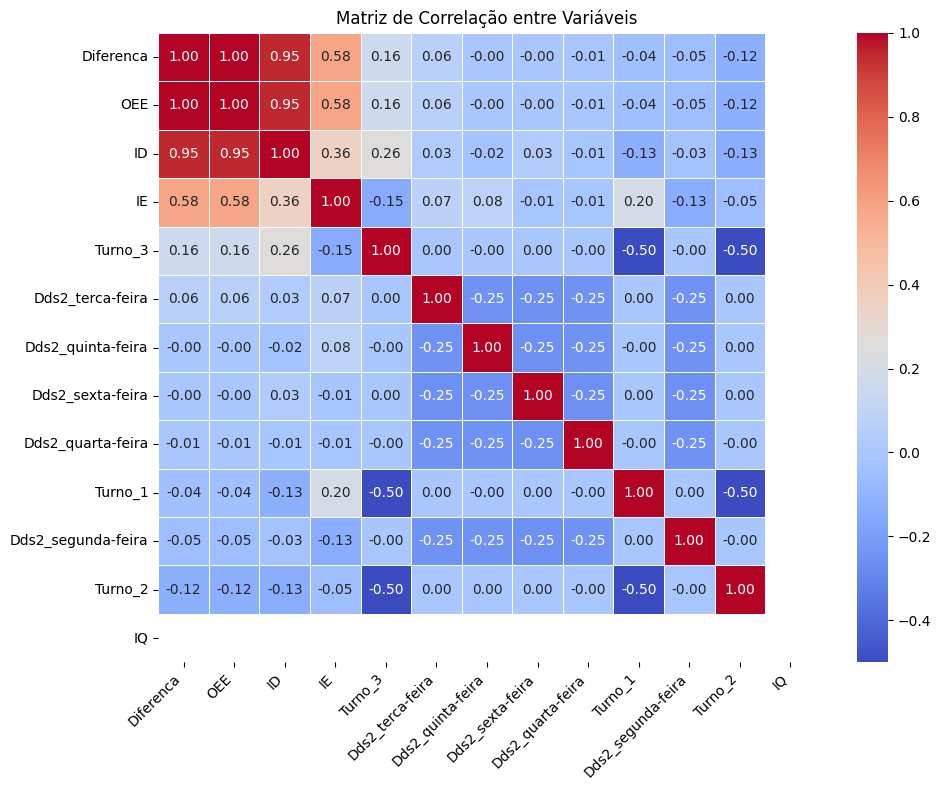

In [70]:
# Gerar dummies para as colunas "Turno" e "Dds2"
df_unico_dummies = pd.get_dummies(df_unico, columns=["Turno", "Dds2"], prefix=["Turno", "Dds2"])

# Exibir as novas colunas geradas
print(df_unico_dummies.filter(like="Turno_").columns)
print(df_unico_dummies.filter(like="Dds2_").columns)

correlacoes_com_oee = df_unico_dummies.corr(numeric_only=True)["OEE"].sort_values(ascending=False)
print(correlacoes_com_oee)

# Lista das colunas a incluir no mapa de calor
colunas_para_correlacao = [
    "Diferenca", "OEE", "ID", "IE", "Turno_3", "Dds2_terca-feira", "Dds2_quinta-feira",
    "Dds2_sexta-feira", "Dds2_quarta-feira", "Turno_1", "Dds2_segunda-feira", "Turno_2", "IQ"
]

# Criar a matriz de correlação
matriz_correlacao = df_unico_dummies[colunas_para_correlacao].corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- A disponibilidade foi a variável que mais correlacionou com a Diferença e o OEE, isso porque não posso considerar a correlação entre OEE e Diferença por ser uma causalidade. O terceiro turno apresentou um valor maior de correlação com o ID em relação aos outros turnos, mas isso faz sentido pois alguns casos o terceiro turno dos equipamentos ficam com os indicadores zerados por conta de falta de programação. Os dias da semana e turnos não aparesentaram uma correlação forte em relação ao OEE, mas serão variáveis que serão consideradas no treinamento do modelo. O IQ não apresentou nenhum resultado pois não houveram problemas de qualidade no período nesse equipamento.

-Agora inicia-se a preparação da base de dados para o treinamento do modelo.


In [71]:
#Agora vou filtrar novamente pois não vou conseguir fornecer como variável de entrada o ID, IQ ou o IE.
colunas_desejadas3 = ["Data", "Turno", "Dds2",  "OEE"]
df_unico = df_unico[colunas_desejadas3]

#Conversão da coluna data para um número

df_unico["Data"] = pd.to_datetime(df_unico["Data"], errors='coerce')
df_unico["Data"] = df_unico["Data"].map(lambda x: x.toordinal() if pd.notnull(x) else None)

#Conversão de colunas com strings para binarios
df_unico = pd.get_dummies(df_unico, columns=["Turno", "Dds2"], drop_first=True)

print(df_unico.head())

# Separar features (X) e target (y)
X = df_unico.drop("OEE", axis=1)
y = df_unico["OEE"]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

       Data    OEE  Turno_2  Turno_3  Dds2_quinta-feira  Dds2_segunda-feira  \
36   739261  60.34    False    False              False               False   
37   739261  60.34     True    False              False               False   
38   739261  60.34    False     True              False               False   
152  739264  34.13    False    False              False                True   
153  739264  43.64     True    False              False                True   

     Dds2_sexta-feira  Dds2_terca-feira  
36               True             False  
37               True             False  
38               True             False  
152             False             False  
153             False             False  
Dimensões de X_train: (222, 7)
Dimensões de X_test: (96, 7)
Dimensões de y_train: (222,)
Dimensões de y_test: (96,)


/tmp/ipython-input-71-3883917048.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico["Data"] = pd.to_datetime(df_unico["Data"], errors='coerce')
/tmp/ipython-input-71-3883917048.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico["Data"] = df_unico["Data"].map(lambda x: x.toordinal() if pd.notnull(x) else None)


- Por não apresentar um comportamento normal, vou optar pelo uso da normalização dos dados.

In [72]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
       Data  Turno_2  Turno_3  Dds2_quinta-feira  Dds2_segunda-feira  \
0  0.571429      0.0      0.0                0.0                 0.0   
1  0.972789      1.0      0.0                0.0                 1.0   
2  0.850340      0.0      0.0                1.0                 0.0   
3  0.503401      1.0      0.0                0.0                 0.0   
4  0.217687      0.0      0.0                0.0                 0.0   

   Dds2_sexta-feira  Dds2_terca-feira  
0               1.0               0.0  
1               0.0               0.0  
2               0.0               0.0  
3               0.0               1.0  
4               0.0               1.0  


- Finaliza-se aqui os códigos pois não faz sentido plotar uma distribuição de dados binários. Agora os dados podem ser utilizados para treinar o modelo e verificar a acurácia em relação aos dados de teste.

# Conclusão

A análise dos dados de OEE das máquinas demonstra a diferença de informações entre os equipamentos. Por mais que esses equipamentos pertençam a um grupo semelhante, o fato de produzirem ordens de produção diferentes e terem operadores diferentes já são o suficiente que as variáveis Eventos, ID, IE e IQ.


As hipóteses que traçadas foram as seguintes:

1.   *Há alguma correlação entre o OEE e o dia da semana?* Não, nem mesmo quando avalia-se apenas uma máquina individualmente.

2.   *Existe alguma correlação entre o OEE e os eventos de parada?* Baixa, pois alguns eventos afetam significativamente o ID e por conseguinte o OEE, mas por serem aleatórios não geram forte correlação, como por exemplo uma "quebra de máquina".

3.   *Há algum padrão visual entre os equipamentos?* Não pois os comportamentos individualis de cada equipamento prevalecem em relação ao fato dos equipamentos serem de um grupo semelhante.

Por fim, entende-se que cada equipamento possui um comportamento individual e deve ser tratado individualmente. Caso o modelo não apresente uma acuracia adequada, provavelmente faria as seguintes ações:

- Aumentaria a base de dados para mais de 2 anos pois acho que modelo pode não conseguir identificar o padrão que pode ocorrer durante os outros meses do ano.

- Separaria em modelos menores para tentar prever o ID e o IE separadamente e depois multiplicaria para obter o OEE.

- Avalia a possibilidade de tentar identificar se teve operadores de máquinas diferentes pois o operador mais experiente deve ter um IE maior que um operador mais novo.




# Agradeço desde já e tenham um ótimo dia.